# Simple data exploration.
Visualizations and basic statistics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
class Covid_Countries():
    df = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')
    
    def __init__(self, country):
        if country not in Covid_Countries.df['Country/Region'].unique():
            print('Country data not found')
        else:
            self.selected_country = Covid_Countries.df[['ObservationDate', 'Confirmed', 'Deaths', 'Recovered']].loc[
                Covid_Countries.df['Country/Region']==country].groupby('ObservationDate').sum()
            self.selected_country['Current Cases'] = (self.selected_country['Confirmed'] - self.selected_country['Recovered'] - 
            self.selected_country['Deaths'])
            self.selected_country['Death Rate'] = (self.selected_country['Deaths']/self.selected_country['Confirmed']*100)
            self.selected_country['Day'] = range(len(self.selected_country))
            
    def World_stats():
        world = Covid_Countries.df[['ObservationDate', 'Confirmed', 'Deaths', 'Recovered', 'Country/Region']].groupby(
            'ObservationDate').sum()
        print('Total Confirmed Cases: '+ str(world['Confirmed'].max()))
        print('Total Deaths: '+ str(world['Deaths'].max()))
        print('Total Recovered: '+ str(world['Recovered'].max()))
        print('Current Cases: '+ str(world['Confirmed'].max()- world['Recovered'].max()- world['Deaths'].max()))
        print('General Death Rate: '+ str(world['Deaths'].max()/world['Confirmed'].max()*100) + 
              ' (calculated with confirmed cases, does not represent real death rate)')
        
    def Countries_list():
        print(Covid_Countries.df['Country/Region'].unique())
        
    def Dataframe_desc():
        print('Shape: ' + str(Covid_Countries.df.shape))
        for col in Covid_Countries.df.columns:
            print(str(col) + ': ' + str(Covid_Countries.df[col].dtype) + ' with ' + 
                  str(Covid_Countries.df[col].isnull().sum()) + ' null values.')
        
    def Basic_stats(self):
        print('Last Update: '+ str(self.selected_country.index[-1]))
        print('Confirmed Cases: '+ str(self.selected_country['Confirmed'].max()))
        print('Deaths: '+ str(self.selected_country['Deaths'].max()))
        print('Recovered: '+ str(self.selected_country['Recovered'].max()))
        print('Current Cases: '+ str(self.selected_country['Current Cases'][-1]))
        print('Death Rate: '+ str(self.selected_country['Death Rate'].max()))
        
    def Basic_graphs(self):
        plt.figure(figsize=(16, 15))
        plt.subplot(311)
        plt.title('Observation Date vs Confirmed')
        plt.plot(self.selected_country['Day'], self.selected_country['Confirmed'])
        plt.xticks(rotation=70)
        plt.ylabel('Confirmed')
        plt.subplots_adjust(hspace=0.5)
        plt.subplot(312)
        plt.title('Observation Date vs Deaths')
        plt.plot(self.selected_country['Day'], self.selected_country['Deaths'])
        plt.xticks(rotation=70)
        plt.ylabel('Deaths')
        plt.subplot(313)
        plt.title('Observation Date vs Death Rate')
        plt.plot(self.selected_country['Day'], (self.selected_country['Deaths']/self.selected_country['Confirmed']*100))
        plt.xticks(rotation=70)
        plt.ylabel('Death Rate')
        plt.show()
        
    def Conf_vs_deaths(self):
        plt.figure(figsize=(15, 4))
        plt.title('Confirmed vs Deaths')
        plt.plot(self.selected_country['Confirmed'], self.selected_country['Deaths'])
        plt.xticks(rotation=70)
        plt.ylabel('Deaths')
        plt.show()
        
    def Rec_vs_Deaths(self):
        plt.figure(figsize=(15, 4))
        plt.title('Recovered vs Deaths')
        plt.plot(self.selected_country['Recovered'], self.selected_country['Deaths'])
        plt.xticks(rotation=70)
        plt.ylabel('Deaths')
        plt.show()
        
    def Free_vs_plot(self, column1, column2):
        if column1 and column2 not in Covid_Countries.df.columns:
            print('Wrong column names')
        else:
            plt.figure(figsize=(15, 4))
            plt.title(str(column1) + ' vs ' + str(column2))
            plt.plot(self.selected_country[column1], self.selected_country[column2])
            plt.xticks(rotation=70)
            plt.ylabel(str(column2))
            plt.show()

In [3]:
Covid_Countries.World_stats()

Total Confirmed Cases: 23889150.0
Total Deaths: 819414.0
Total Recovered: 15570191.0
Current Cases: 7499545.0
General Death Rate: 3.4300676248422404 (calculated with confirmed cases, does not represent real death rate)


In [4]:
Covid_Countries.Dataframe_desc()

Shape: (95284, 8)
SNo: int64 with 0 null values.
ObservationDate: object with 0 null values.
Province/State: object with 30481 null values.
Country/Region: object with 0 null values.
Last Update: object with 0 null values.
Confirmed: float64 with 0 null values.
Deaths: float64 with 0 null values.
Recovered: float64 with 0 null values.


In [5]:
Covid_Countries.Countries_list()

['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia

In [6]:
italy = Covid_Countries('Italy')
italy.Basic_stats()

Last Update: 08/25/2020
Confirmed Cases: 261174.0
Deaths: 35445.0
Recovered: 206015.0
Current Cases: 19714.0
Death Rate: 14.525233448746198


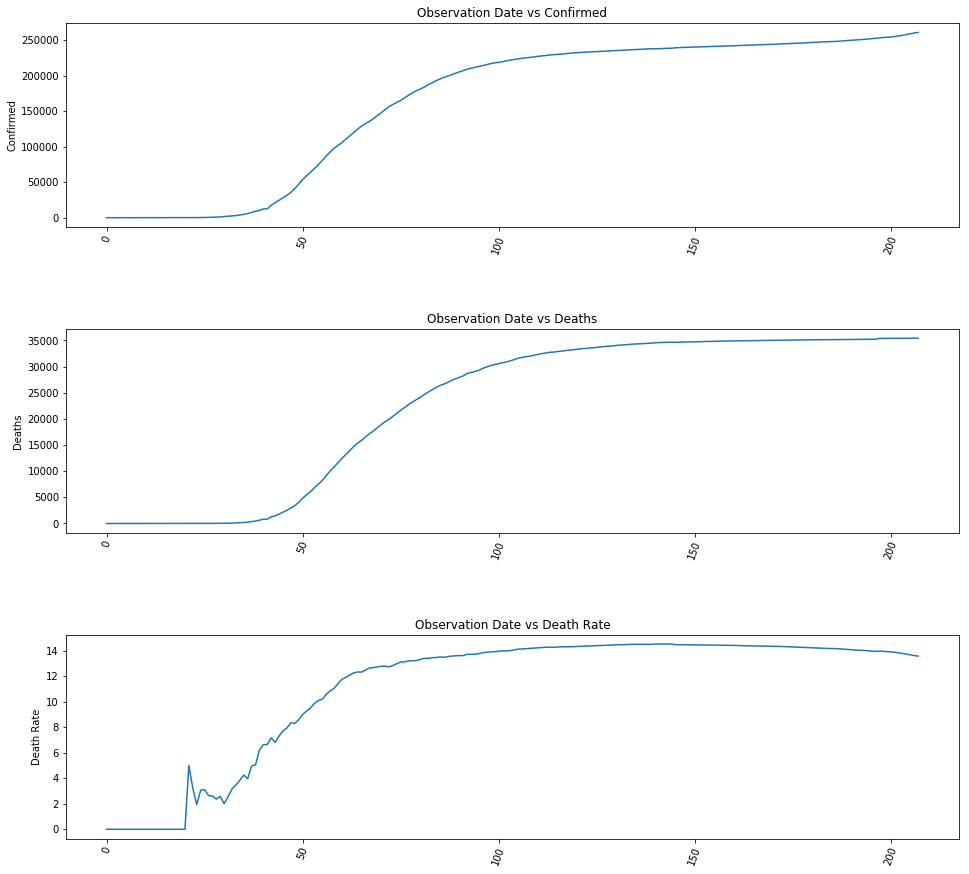

In [7]:
italy.Basic_graphs()

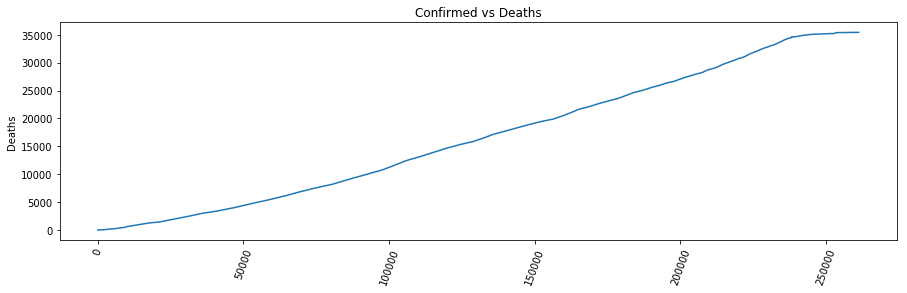

In [8]:
italy.Conf_vs_deaths()

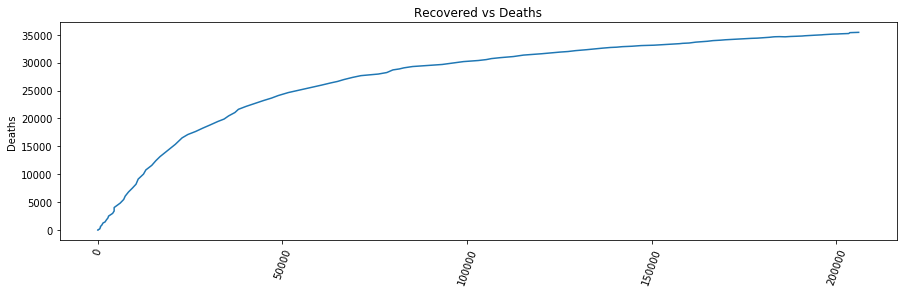

In [9]:
italy.Rec_vs_Deaths()

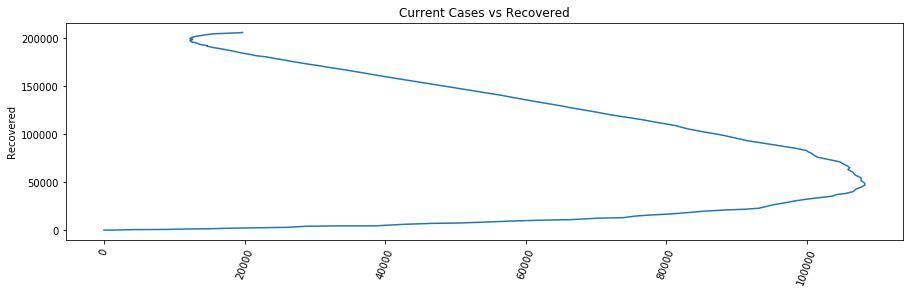

In [10]:
italy.Free_vs_plot('Current Cases','Recovered')

In [11]:
argentina = Covid_Countries('Argentina')
argentina.Basic_stats()

Last Update: 08/25/2020
Confirmed Cases: 359638.0
Deaths: 7563.0
Recovered: 263202.0
Current Cases: 88873.0
Death Rate: 8.333333333333332


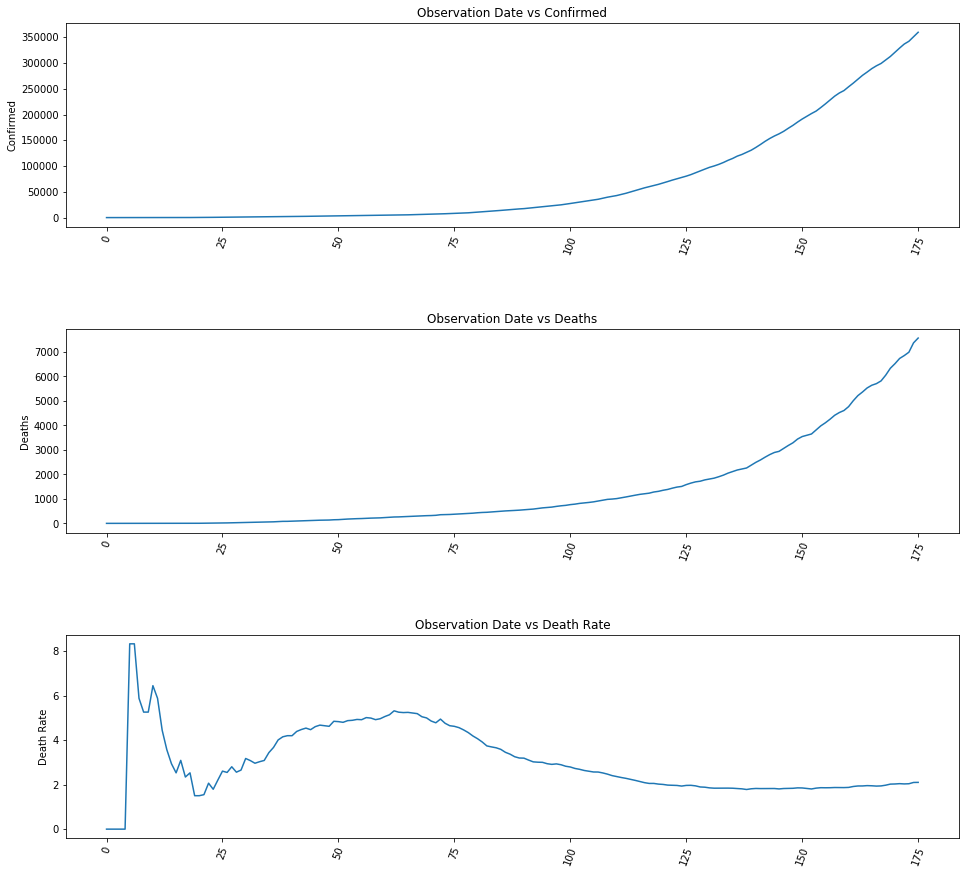

In [12]:
argentina.Basic_graphs()

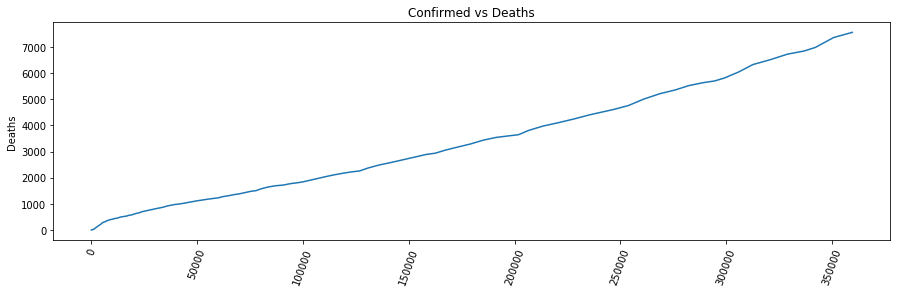

In [13]:
argentina.Conf_vs_deaths()

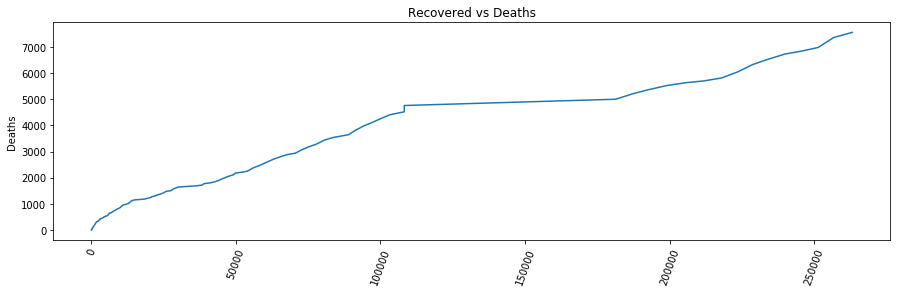

In [14]:
argentina.Rec_vs_Deaths()

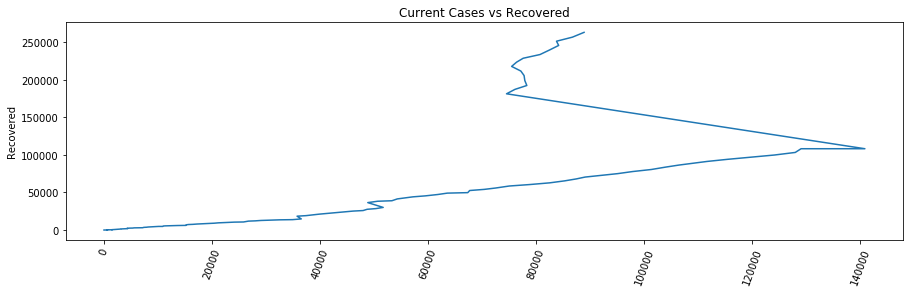

In [15]:
argentina.Free_vs_plot('Current Cases','Recovered')